# Predicting titanic
This code are written in Kaggle

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
df = pd.read_csv('../input/titanic/train.csv')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.dropna(inplace=True)

df.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [26]:
df["Title"] = df['Name'].apply(lambda x: x.split(", ")[1].split(" ")[0].split(".")[0])

drop_idx = df[df["Title"] == "the"].index

df.drop(drop_idx, inplace=True)

In [27]:
df["Title"] = df["Title"].replace({"Rev":"Other",
                                  "Don":"Other",
                                  "Jonkheer":"Other",
                                  "Mme":"Other",
                                  "Capt":"Other",
                                  "Col":"Other",
                                  "Sir":"Other",
                                  "Major":"Other",
                                  "Lady":"Miss",
                                  "Ms":"Miss",
                                  "Dr":"Other",
                                  "Mlle":"Other"})

df.drop("Name", axis=1, inplace=True)

In [28]:
titles = df.groupby(["Title"])["Survived"].count()
titles

Title
Master     7
Miss      45
Mr        81
Mrs       38
Other     11
Name: Survived, dtype: int64

In [29]:
percentage = []
title_name = []

total_survived = df[df["Survived"] == 1]["Survived"].count()
for i in titles.keys():
    title_name.append(i)
    
    title = df[(df["Title"] == i) & (df["Survived"] == 1)]["Survived"].count()
    percentage.append(str(round(title / total_survived * 100, 2)) + "%")
    
title_survive_percentage = pd.DataFrame({"Title":title_name,
                                         "Percentage":percentage})

title_survive_percentage

,Title,Percentage
0,Master,5.74%
1,Miss,34.43%
2,Mr,24.59%
3,Mrs,28.69%
4,Other,6.56%


In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,1,female,35.0,1,0,53.1000,S,Mrs
6,0,1,male,54.0,0,0,51.8625,S,Mr
10,1,3,female,4.0,1,1,16.7000,S,Miss
11,1,1,female,58.0,0,0,26.5500,S,Miss


In [35]:
df["Age"] = round(df["Age"])

In [49]:
df_new = pd.get_dummies(df)

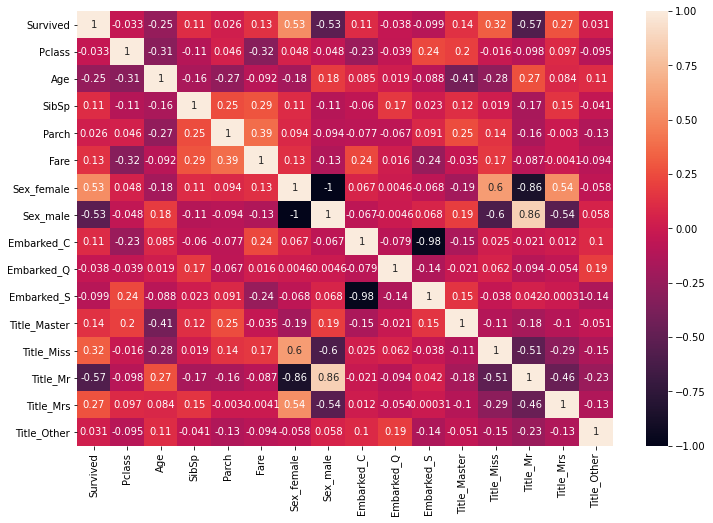

In [50]:
import seaborn as sns

plt.figure(figsize=(12,8))

ax = sns.heatmap(df_new.corr(), annot=True)

In [51]:
features = df_new.drop('Survived', axis=1)
label = df_new['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=42, test_size=0.2)

In [67]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Precision:  0.7083333333333334
Recall:  0.85
F1:  0.7727272727272727
Accuracy:  0.7297297297297297
